# **Deep Learning Lab: Transfer Learning**

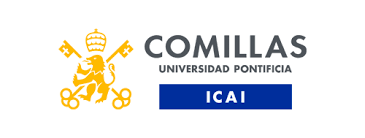

***

## Import packages

In [2]:
from cnn import CNN
import torchvision
from cnn import load_data
from cnn import load_model_weights
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import json

## Model and data loading

In [3]:
# Pytorch has many pre-trained models that can be used for transfer learning
classification_models = torchvision.models.list_models(module=torchvision.models)
print(classification_models)

['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'squeezenet1_0

In [4]:
# Load data and model 
train_dir = '../dataset/training'
valid_dir = '../dataset/validation'

train_loader, valid_loader, num_classes = load_data(train_dir, 
                                                    valid_dir, 
                                                    batch_size=32, 
                                                    img_size=224) # ResNet50 requires 224x224 images
model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes)

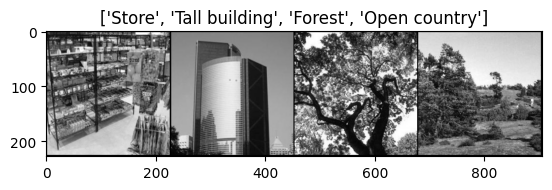

In [4]:
# Visualize a few images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(valid_loader.dataset[i][1])
out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])

Cosas a cambiar 
+ epochs
+ modelos
+ weights
+ batch size -> + tarda mas cada paso estimando mejor. hay que ajustarlo para que entrene rapido y no tarde demasiado
+ funcion de perdida
+ data augmentation
+ mirar cuantas capas se descongelan. Muchas pierde generalizacion

## Train

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
history = model.train_model(train_loader, valid_loader, optimizer, criterion, epochs=1)

Epoch 1/1 - Train Loss: 2.6411, Train Accuracy: 0.2951
Epoch 1/1 - Validation Loss: 2.5253, Validation Accuracy: 0.4673


In [15]:
# model.save_model('resnet50-1epoch')
torch.save(model.state_dict(), 'modelo.pth')

## Predict

#### Load model

In [5]:
# Load model
# model_weights = load_model_weights('resnet50-1epoch')
model_weights = torch.load('modelo.pth')
my_trained_model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes)
my_trained_model.load_state_dict(model_weights)

<All keys matched successfully>

## Results

In [6]:
predicted_labels = my_trained_model.predict(valid_loader)

[989]


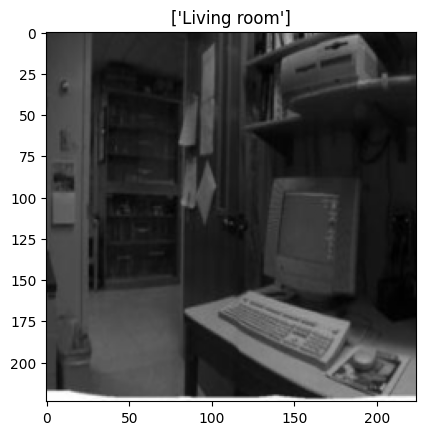

In [44]:
# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=1, replace=False)
inputs = []
classes = []
print(random_indices)

for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(predicted_labels[i])

out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])


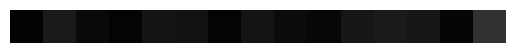

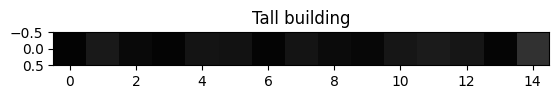

In [6]:
import torch
import torchvision
from PIL import Image
from torchvision import transforms

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


model_weights = torch.load('modelo.pth')
my_trained_model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes)
my_trained_model.load_state_dict(model_weights)

# Cargar una imagen
imagen = Image.open("torre.jpg")

# Preprocesar la imagen
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
imagen = transform(imagen)
imagen = imagen.unsqueeze(0)  # Añadir dimensión del lote

# Pasar la imagen por el modelo
output = my_trained_model(imagen)
# Obtener las etiquetas predichas
_, predicted = torch.max(output, 1)

# Mostrar las etiquetas predichas
classes = [predicted.item()]

out = torchvision.utils.make_grid(output)
plt.imshow(out.permute(1, 2, 0))
plt.axis('off')  # Desactivar ejes
plt.show()
classnames = train_loader.dataset.classes
for x in classes:
    title = classnames[x]
imshow(out, title=title)
